**INSTALACIÓN DE LAS LIBRERIAS**

In [1]:
!pip install numpy pandas matplotlib seaborn

**IMPORTACIÓN DE LAS LIBRERIAS**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**LECTURA DEL DATASET**

In [3]:
path = '/content/vgsales.csv'
data = pd.read_csv(path, encoding='windows-1252' )

**VERFICACIÓN DE LAS COLUMNAS Y TIPOS DE DATOS**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**INSPECCIÓN INICIAL AL DATASET**

In [5]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**CONTEO DE VALORES NULOS**

In [6]:
# Conteo de nulos por columna
print(data.isnull().sum())

# Conteo total de nulos en todo el DataFrame
print("Total de nulos:", data.isnull().sum().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Total de nulos: 329


**ELIMINACIÓN DE FILAS CON VALORES FALTANTES EN LA COLUMNA 'YEAR' Y MANEJO DE VALORES FALTANTES EN LA COLUMNA 'PUBLISHER'**

In [7]:
data = data.dropna(subset=['Year'])
data['Publisher'] = data['Publisher'].fillna('Unknown')
# Conteo de nulos por columna
print(data.isnull().sum())

# Conteo total de nulos en todo el DataFrame
print("Total de nulos:", data.isnull().sum().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Total de nulos: 0


**AJUSTE DE TIPOS DE DATOS**

In [8]:
data["Year"] = data["Year"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


**VERIFICACIÓN DE FILAS DUPLICADAS**

In [9]:
# Número total de filas duplicadas (completas)
print("Duplicados en todo el DataFrame:", data.duplicated().sum())
# Verificar duplicados con columnas clave
duplicados_exactos = data[data.duplicated(
    subset=["Name", "Platform", "Year", "Publisher"],
    keep=False
)]
print(duplicados_exactos.head(20))


Duplicados en todo el DataFrame: 0
        Rank           Name Platform  Year   Genre        Publisher  NA_Sales  \
603      604  Madden NFL 13      PS3  2012  Sports  Electronic Arts      2.11   
16127  16130  Madden NFL 13      PS3  2012  Sports  Electronic Arts      0.00   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  
603        0.23       0.0         0.22          2.56  
16127      0.01       0.0         0.00          0.01  


In [10]:
data = data.drop_duplicates(subset=["Name", "Platform", "Year", "Publisher"], keep="first")

In [11]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**CREACIÓN DE NUEVAS COLUMNAS**

In [12]:
def clasificar_ventas(ventas):
    if ventas < 0.5:
        return "Bajo rendimiento"
    elif ventas < 1:
        return "Rendimiento moderado"
    elif ventas < 10:
        return "Million Seller"
    else:
        return "Superventas"

data["Ventas_Nivel"] = data["Global_Sales"].apply(clasificar_ventas)

In [13]:
def clasificar_periodo(year):
    if pd.isna(year):
        return "Desconocido"
    elif year < 2000:
        return "Retro"
    elif 2000 <= year <= 2010:
        return "Clásicos"
    else:
        return "Modernos"

data["Periodo"] = data["Year"].apply(clasificar_periodo)

In [14]:
print(data[["Name", "Global_Sales", "Ventas_Nivel", "Year", "Periodo"]].head(20))

                                            Name  Global_Sales Ventas_Nivel  \
0                                     Wii Sports         82.74  Superventas   
1                              Super Mario Bros.         40.24  Superventas   
2                                 Mario Kart Wii         35.82  Superventas   
3                              Wii Sports Resort         33.00  Superventas   
4                       Pokemon Red/Pokemon Blue         31.37  Superventas   
5                                         Tetris         30.26  Superventas   
6                          New Super Mario Bros.         30.01  Superventas   
7                                       Wii Play         29.02  Superventas   
8                      New Super Mario Bros. Wii         28.62  Superventas   
9                                      Duck Hunt         28.31  Superventas   
10                                    Nintendogs         24.76  Superventas   
11                                 Mario Kart DS    

In [15]:
pd.concat([data.head(5), data.tail(5)])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ventas_Nivel,Periodo
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Superventas,Clásicos
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Superventas,Retro
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Superventas,Clásicos
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Superventas,Clásicos
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Superventas,Retro
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Bajo rendimiento,Clásicos
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Bajo rendimiento,Clásicos
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Bajo rendimiento,Clásicos
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,Bajo rendimiento,Clásicos
16597,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,Bajo rendimiento,Clásicos


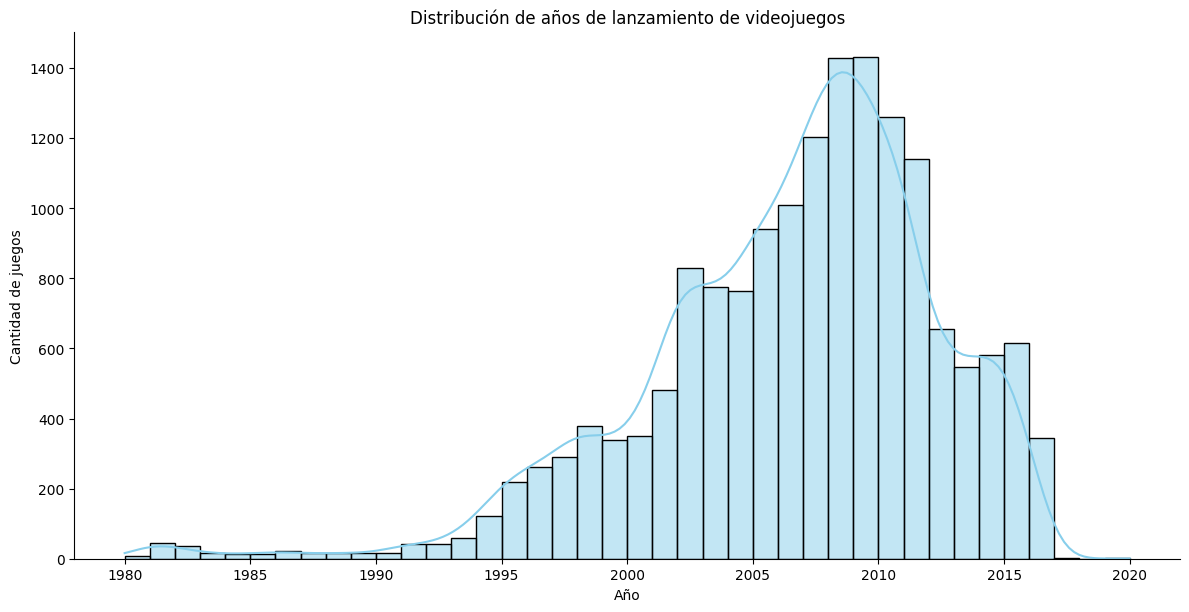

In [16]:

sns.displot(data=data, x="Year", kde=True, bins=40, color="skyblue", height = 6, aspect = 2)
plt.title("Distribución de años de lanzamiento de videojuegos")
plt.xlabel("Año")
plt.ylabel("Cantidad de juegos")
plt.show()


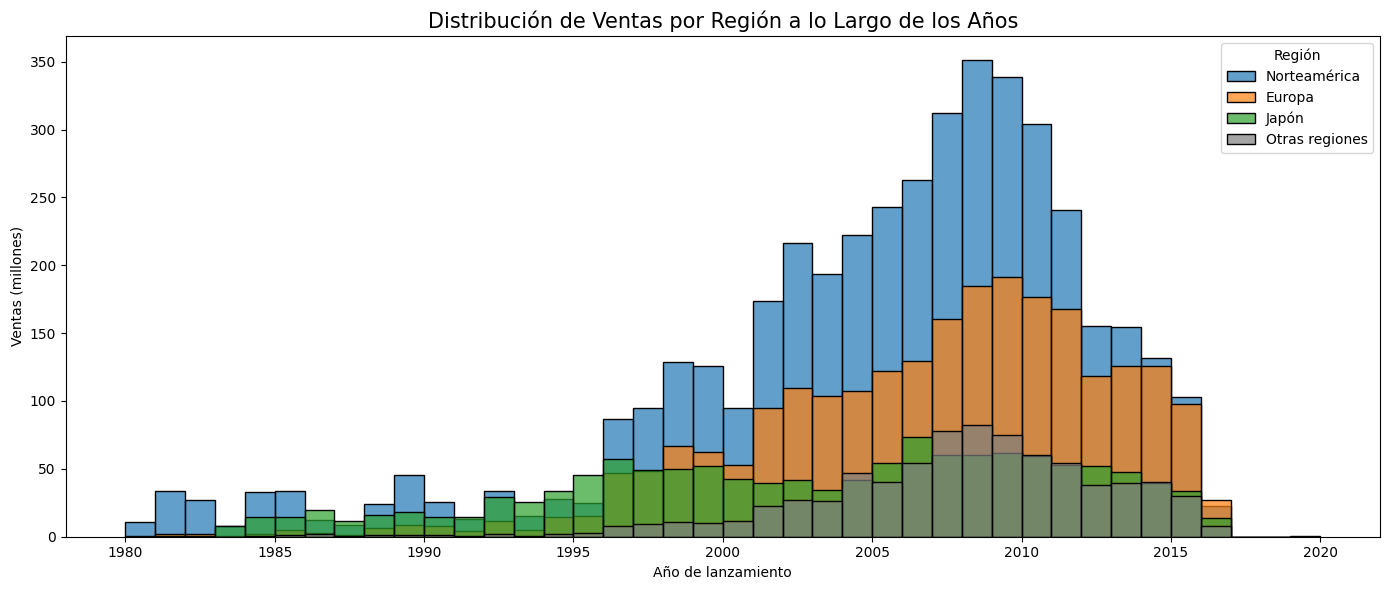

In [17]:
plt.figure(figsize=(14, 6))

sns.histplot(data=data, x="Year", weights="NA_Sales", bins=40, color="#1f77b4", label="Norteamérica", alpha=0.7)
sns.histplot(data=data, x="Year", weights="EU_Sales", bins=40, color="#ff7f0e", label="Europa", alpha=0.7)
sns.histplot(data=data, x="Year", weights="JP_Sales", bins=40, color="#2ca02c", label="Japón", alpha=0.7)
sns.histplot(data=data, x="Year", weights="Other_Sales", bins=40, color="#7f7f7f", label="Otras regiones", alpha=0.7)

plt.title("Distribución de Ventas por Región a lo Largo de los Años", fontsize=15)
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas (millones)")
plt.legend(title="Región")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3534040625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


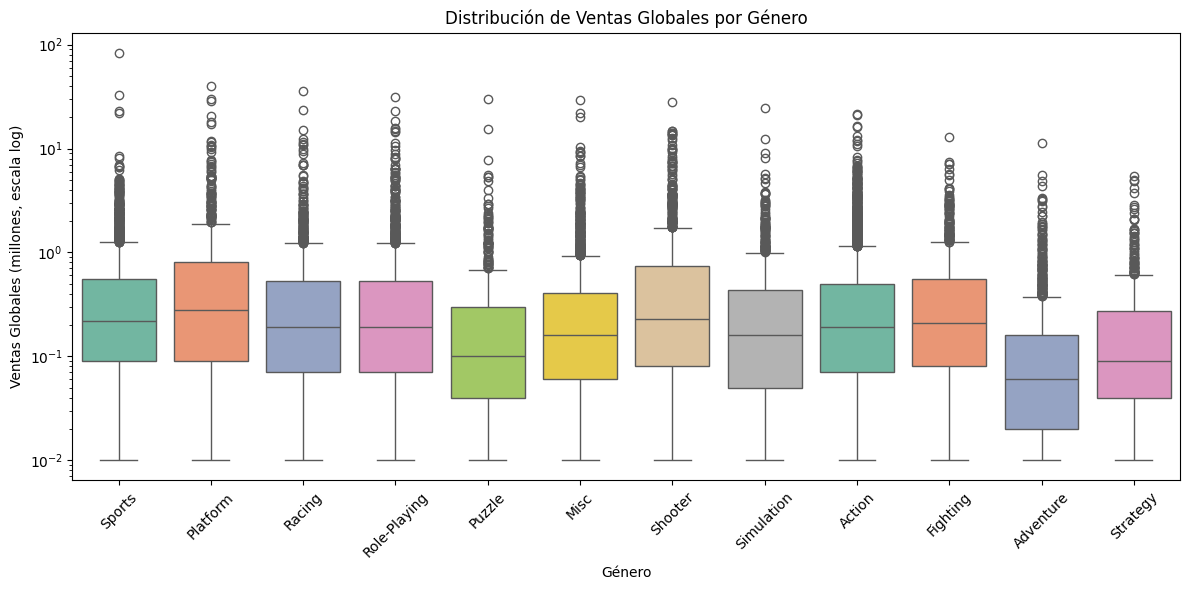

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x="Genre",
    y="Global_Sales",
    palette="Set2"
)

plt.yscale("log")
plt.title("Distribución de Ventas Globales por Género")
plt.xlabel("Género")
plt.ylabel("Ventas Globales (millones, escala log)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1785898243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


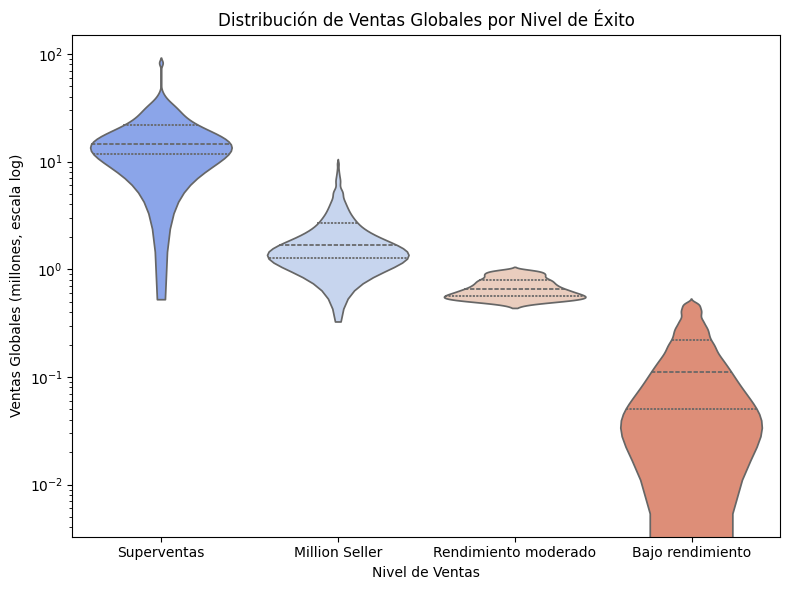

In [19]:
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=data,
    x="Ventas_Nivel",
    y="Global_Sales",
    palette="coolwarm",
    inner="quartile"
)
plt.yscale("log")
plt.title("Distribución de Ventas Globales por Nivel de Éxito")
plt.xlabel("Nivel de Ventas")
plt.ylabel("Ventas Globales (millones, escala log)")
plt.tight_layout()
plt.show()


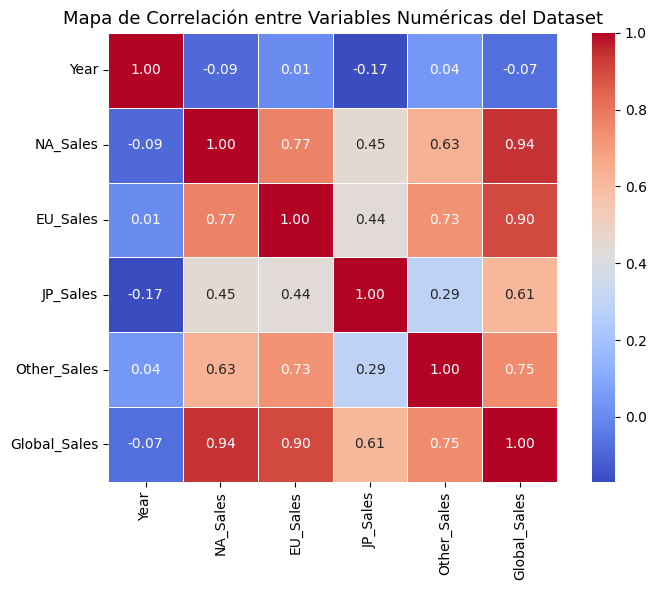

In [20]:
corr_data = data[["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]

# Calcular la matriz de correlación
corr_matrix = corr_data.corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,        # Muestra los valores en cada celda
    cmap="coolwarm",   # Escala de color
    fmt=".2f",         # Formato de los números
    linewidths=0.5,    # Líneas divisorias
    square=True
)

plt.title("Mapa de Correlación entre Variables Numéricas del Dataset", fontsize=13)
plt.tight_layout()
plt.show()

In [21]:
!pip install jupyter-dash dash plotly

In [22]:
# =====================================================
# DASHBOARD CON LAS 5 GRÁFICAS DE VENTAS DE VIDEOJUEGOS
# =====================================================

from jupyter_dash import JupyterDash
from dash import dcc, html
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from IPython.display import clear_output

# =====================================================
# CARGA DE DATOS (asegúrate de que 'data' ya existe)
# =====================================================
# data = pd.read_csv("ventas_videojuegos.csv")

# =====================================================
# 1️⃣ Distribución de años de lanzamiento
# =====================================================
fig1 = px.histogram(
    data, x="Year", nbins=40,
    title="Distribución de años de lanzamiento de videojuegos",
    color_discrete_sequence=["skyblue"]
)
fig1.update_layout(
    xaxis_title="Año",
    yaxis_title="Cantidad de juegos",
    bargap=0.1,
    template="simple_white"
)
fig1.update_traces(marker_line_width=0)

# =====================================================
# 2️⃣ Distribución de Ventas por Región a lo largo de los años
# =====================================================
fig2 = go.Figure()
regions = {
    "NA_Sales": "#1f77b4",
    "EU_Sales": "#ff7f0e",
    "JP_Sales": "#2ca02c",
    "Other_Sales": "#7f7f7f"
}
for region, color in regions.items():
    fig2.add_trace(go.Histogram(
        x=data["Year"],
        y=data[region],
        histfunc="sum",
        nbinsx=40,
        name=region.replace("_Sales", "").replace("_", " "),
        marker_color=color,
        opacity=0.7
    ))
fig2.update_layout(
    title="Distribución de Ventas por Región a lo Largo de los Años",
    xaxis_title="Año de lanzamiento",
    yaxis_title="Ventas (millones)",
    barmode="overlay",
    template="simple_white",
    legend_title="Región"
)

# =====================================================
# 3️⃣ Distribución de Ventas Globales por Género
# =====================================================
fig3 = px.box(
    data, x="Genre", y="Global_Sales",
    color_discrete_sequence=["#66c2a5"],
    points=False
)
fig3.update_layout(
    title="Distribución de Ventas Globales por Género",
    yaxis_type="log",
    yaxis=dict(
        tickvals=[0.01, 0.1, 1, 10, 100],
        ticktext=["0.01", "0.1", "1", "10", "100"]
    ),
    xaxis_title="Género",
    yaxis_title="Ventas Globales (millones, escala log)",
    xaxis_tickangle=45,
    template="simple_white",
    width=1000,
    height=500,
    margin=dict(l=60, r=20, t=70, b=100)
)
fig3.update_traces(boxmean=True, marker_line_width=1.2)

# =====================================================
# 4️⃣ Distribución de Ventas Globales por Nivel de Éxito
# =====================================================
fig4 = px.violin(
    data,
    x="Ventas_Nivel",
    y="Global_Sales",
    color="Ventas_Nivel",
    color_discrete_sequence=px.colors.sequential.RdBu,
    box=False,
    points=False,
    hover_data=["Global_Sales"]
)
fig4.update_layout(
    title="Distribución de Ventas Globales por Nivel de Éxito",
    yaxis_type="log",
    yaxis=dict(
        tickvals=[0.01, 0.1, 1, 10, 100],
        ticktext=["0.01", "0.1", "1", "10", "100"]
    ),
    xaxis_title="Nivel de Ventas",
    yaxis_title="Ventas Globales (millones, escala log)",
    width=1200,
    height=500,
    template="simple_white",
    showlegend=False,
    margin=dict(l=60, r=40, t=70, b=100)
)

# =====================================================
# 5️⃣ Mapa de correlación
# =====================================================
corr_data = data[["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
corr_matrix = corr_data.corr()

fig5 = go.Figure(
    data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.columns,
        colorscale="RdBu",
        zmin=-1, zmax=1,
        text=np.round(corr_matrix.values, 2),
        texttemplate="%{text}",
        textfont={"size":12},
        hoverongaps=False
    )
)
fig5.update_layout(
    title="Mapa de Correlación entre Variables Numéricas del Dataset",
    template="simple_white"
)

# =====================================================
# Crear app Dash
# =====================================================
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("Dashboard de Ventas de Videojuegos", style={'textAlign': 'center'}),
    html.Hr(),
    dcc.Graph(figure=fig1),
    dcc.Graph(figure=fig2),
    dcc.Graph(figure=fig3),
    dcc.Graph(figure=fig4),
    dcc.Graph(figure=fig5)
])

# =====================================================
# Ejecutar dentro de Colab (sin duplicados)
# =====================================================
clear_output(wait=True)
app.run_server(mode='inline', port=8050)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>